In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# 데이터 불러오기
df_price = pd.read_excel('result.xlsx')
df_price.head()

,year_month,price,importation,slaughter
0,200001,17558,15869000,121079
1,200002,18150,16536000,62486
2,200003,18032,21996000,74258
3,200004,16916,18384000,68224
4,200005,16780,19097000,90450


In [39]:
# data,target 설정
data = df_price['importation']
target = df_price['price']

In [40]:
print(data.shape)
print(target.shape)

(252,)
(252,)


In [41]:
# 계산하기 위해 2차원 배열로 변환
data = np.array(data).reshape(-1,1)

In [42]:
data

array([[15869000],
       [16536000],
       [21996000],
       [18384000],
       [19097000],
       [18825000],
       [20061000],
       [27701000],
       [23520000],
       [20513000],
       [18518000],
       [16821000],
       [16966000],
       [11448000],
       [12330000],
       [ 8451000],
       [ 7510000],
       [ 7926000],
       [12091000],
       [12537000],
       [13222000],
       [19410000],
       [21960000],
       [22422000],
       [28597000],
       [19915000],
       [25063000],
       [23818000],
       [24505000],
       [21399000],
       [24277000],
       [27857000],
       [24614000],
       [25978000],
       [19835000],
       [26388000],
       [28565000],
       [20379000],
       [26729000],
       [24723000],
       [22907000],
       [24144000],
       [30842000],
       [22097000],
       [31162000],
       [22087000],
       [21110000],
       [18861000],
       [ 8157000],
       [ 7353000],
       [12457000],
       [13305000],
       [1743

In [43]:
print(data.shape)

(252, 1)


### data split

In [44]:
train_data, test_data, train_target, test_target = train_test_split(
data, target, test_size=0.3
)

In [45]:
len(train_data), len(train_target), len(test_data), len(test_target)

(176, 176, 76, 76)

# Linear Regression

In [46]:
model = LinearRegression()

In [47]:
# model 학습
model.fit(train_data, train_target)

LinearRegression()

In [48]:
# bias 값
model.intercept_

20989.847815183868

In [49]:
# weight 값
model.coef_

array([0.00050904])

In [50]:
# 모델 예측
model.predict(test_data)

array([28617.37168483, 30960.50385061, 31913.94433431, 35170.30246259,
       31420.68014386, 36318.19797287, 27052.56866993, 32735.54227382,
       38495.89065269, 31363.66715178, 31201.79097782, 31226.73416186,
       40940.32268833, 30348.12323027, 36936.17808351, 30416.33520294,
       35344.90475085, 33805.55396456, 28677.43894435, 29943.43279538,
       33463.98505662, 33114.27143553, 34596.10018517, 35560.23060489,
       32642.89616168, 35915.54371627, 30972.72092034, 37353.5946327 ,
       32168.46662041, 35904.85378026, 30275.32985644, 28353.68659644,
       31086.74690451, 31635.49695333, 36689.80051057, 31310.72651627,
       34213.80771145, 29926.12527992, 33102.0543658 , 28515.56277039,
       29394.68274656, 25308.07292104, 28450.91410973, 24825.49866661,
       36738.15974493, 30391.90106347, 28902.94568983, 29543.32376164,
       43106.81638756, 32966.6485096 , 29472.56656611, 32904.54507179,
       35530.7060197 , 24732.85255447, 37530.23309925, 29773.92095284,
      

### 모델 평가

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
train_pred = model.predict(train_data)
test_pred = model.predict(test_data)

train_mse = mean_squared_error(train_pred, train_target)
test_mse = mean_squared_error(test_pred, test_target)

In [53]:
print(train_mse)
print(test_mse)

74423290.18743752
89492762.9022497


In [54]:
# 가독성을 위해 rms 적용
print(train_mse**(1/2))
print(test_mse**(1/2))

8626.893426224617
9460.061463978429


In [55]:
print(train_pred[:10])
print(train_target[:10])

[41685.05489744 27144.70573749 27762.68584813 32650.53183027
 38147.70416531 32322.70712578 30590.9374912  35251.74959414
 35064.42119158 33748.0319279 ]
234    43580
18     17840
51     30800
40     31200
226    42820
136    31400
47     31200
206    45910
229    43370
26     30206
Name: price, dtype: int64


# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [58]:
data = df_price['importation']
target = df_price['price']

In [59]:
data = np.array(data).reshape(-1,1)

In [60]:
train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2022
)
print(len(train_data))
print(len(test_data))

176
76


In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [62]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [63]:
logit_regression = LogisticRegression()
logit_regression.fit(scaled_train_data, train_target)

LogisticRegression()

In [64]:
train_pred = logit_regression.predict(scaled_train_data)
test_pred = logit_regression.predict(scaled_test_data)

In [65]:
train_pred[:10]

array([21000, 22570, 22570, 21000, 22570, 22570, 22570, 22570, 21000,
       22570], dtype=int64)

In [66]:
train_target[:10]

68     37782
105    33956
155    21000
78     37142
193    28000
209    45750
25     30120
4      16780
120    30360
31     28836
Name: price, dtype: int64

### 정확도 측정

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)
print(f'train_acc is {train_acc:.2f}')
print(f'test_acc is {test_acc:.2f}')

train_acc is 0.06
test_acc is 0.07


# Hyperparameter

In [69]:
from sklearn.model_selection import GridSearchCV

In [102]:
# 탐색범위 선정
params = [
          {"kernel":["linear"], "C":[10,30,100,300,1000,3000,10000,30000]},
          {
            "kernel":["rbf"],
            "C":[10, 30, 100, 300, 1000],
            "gamma":[0.03, 0.1, 0.3, 1.0, 3.0]
          }
]

In [71]:
params

[{'kernel': ['linear'], 'C': [10, 30, 100, 300, 1000, 3000, 10000, 30000]},
 {'kernel': ['rbf'],
  'C': [10, 30, 100, 300, 1000],
  'gamma': [0.03, 0.1, 0.3, 1.0, 3.0]}]

In [72]:
# 탐색 수행
from sklearn.svm import SVC
svm = SVC()
grid_cv = GridSearchCV(svm, params, cv=3, n_jobs=-1)
grid_cv.fit(scaled_train_data, train_target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [10, 30, 100, 300, 1000, 3000, 10000, 30000],
                          'kernel': ['linear']},
                         {'C': [10, 30, 100, 300, 1000],
                          'gamma': [0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}])

In [73]:
# 결과
# Optimized parameter
grid_cv.best_params_

{'C': 100, 'gamma': 0.3, 'kernel': 'rbf'}

In [74]:
# Optimized model
train_pred = grid_cv.best_estimator_.predict(scaled_train_data)
test_pred = grid_cv.best_estimator_.predict(scaled_test_data)

In [75]:
best_train_acc = accuracy_score(train_target, train_pred)
best_test_acc = accuracy_score(test_target, test_pred)
print(f'best_train_acc is {best_train_acc:.2f}')
print(f'best_test_acc is {best_test_acc:.2f}')

best_train_acc is 0.24
best_test_acc is 0.05


# Boosting_Regression

In [76]:
!pip install catboost

### 1.Data Split

In [77]:
data, target = df_price["importation"], df_price["price"]

In [78]:
data = np.array(data).reshape(-1,1)

In [80]:
train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021
)

## 2. XGBoost

In [81]:
!pip install xgboost

In [82]:
import xgboost as xgb


xgb_reg = xgb.XGBRegressor()

### 2.1 학습

In [83]:
xgb_reg.fit(train_data, train_target)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### 2.2 예측

In [84]:
xgb_train_pred = xgb_reg.predict(train_data)
xgb_test_pred = xgb_reg.predict(test_data)

Text(0, 0.5, 'target')

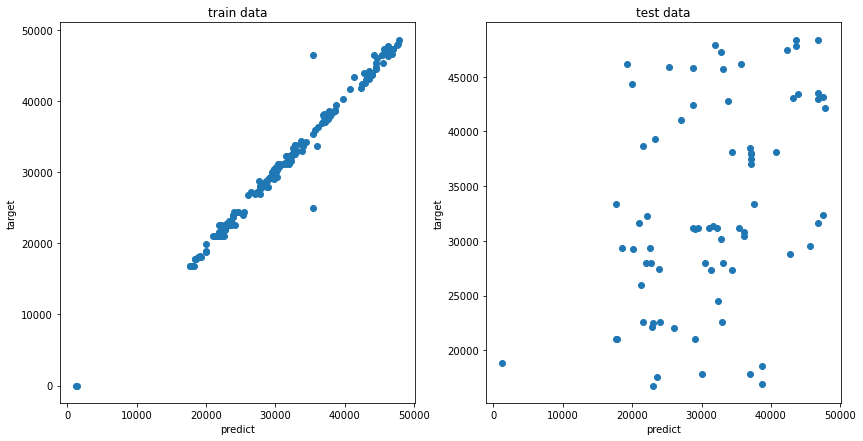

In [85]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(xgb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(xgb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

### 2.3 평가

In [86]:
from sklearn.metrics import mean_squared_error

xgb_train_mse = mean_squared_error(train_target, xgb_train_pred)
xgb_test_mse = mean_squared_error(test_target, xgb_test_pred)

In [87]:
print(f"XGBoost Train MSE is {xgb_train_mse**(1/2):.4f}")
print(f"XGBoost Test MSE is {xgb_test_mse**(1/2):.4f}")

XGBoost Train MSE is 1371.5641
XGBoost Test MSE is 10227.0174


## 3. Light GBM

In [88]:
!pip install lightgbm

In [89]:
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor()

### 3.1 학습

In [90]:
lgb_reg.fit(train_data, train_target)

LGBMRegressor()

### 3.2 예측

In [91]:
lgb_train_pred = lgb_reg.predict(train_data)
lgb_test_pred = lgb_reg.predict(test_data)

Text(0, 0.5, 'target')

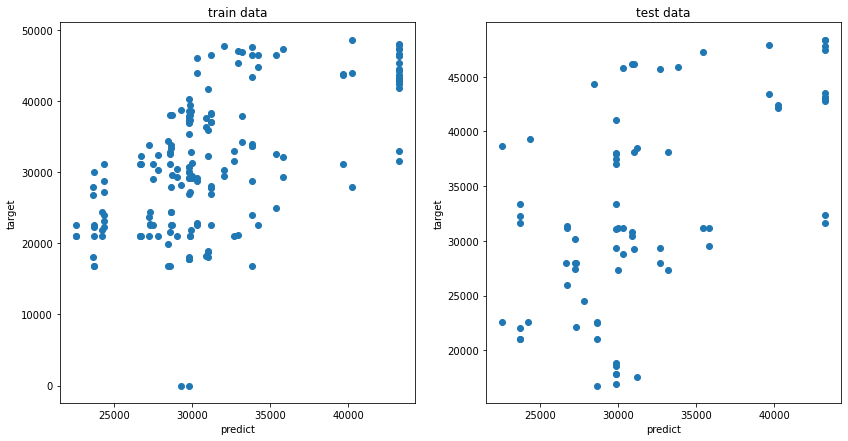

In [92]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(lgb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(lgb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

### 3.3 평가

In [93]:
lgb_train_mse = mean_squared_error(train_target, lgb_train_pred)
lgb_test_mse = mean_squared_error(test_target, lgb_test_pred)

In [94]:
print(f"Light Boost Train MSE is {lgb_train_mse**(1/2):.4f}")
print(f"Light Boost Test MSE is {lgb_test_mse**(1/2):.4f}")

Light Boost Train MSE is 7738.8126
Light Boost Test MSE is 7699.6226


## 4. CatBoost

In [95]:
import catboost as cb


cb_reg = cb.CatBoostRegressor()

### 4.1 학습

In [96]:
cb_reg.fit(train_data, train_target, verbose=False)

### 4.2 예측

In [97]:
cb_train_pred = cb_reg.predict(train_data)
cb_test_pred = cb_reg.predict(test_data)

Text(0, 0.5, 'target')

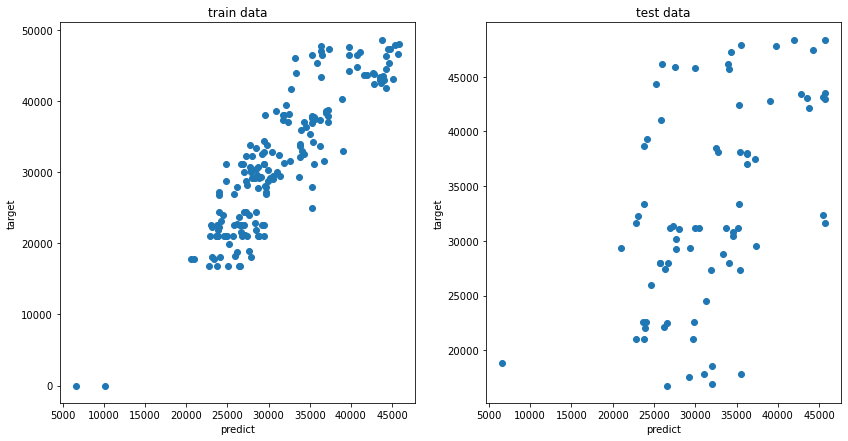

In [98]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(cb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(cb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

### 4.3 평가

In [99]:
cb_train_mse = mean_squared_error(train_target, cb_train_pred)
cb_test_mse = mean_squared_error(test_target, cb_test_pred)

In [100]:
print(f"Cat Boost Train MSE is {cb_train_mse**(1/2):.4f}")
print(f"Cat Boost Test MSE is {cb_test_mse**(1/2):.4f}")

Cat Boost Train MSE is 4806.5644
Cat Boost Test MSE is 8481.6910


## 5. 마무리

In [101]:
print(f"XGBoost Test MSE is {xgb_test_mse**(1/2):.4f}")
print(f"Light Boost Test MSE is {lgb_test_mse**(1/2):.4f}")
print(f"Cat Boost Test MSE is {cb_test_mse**(1/2):.4f}")

XGBoost Test MSE is 10227.0174
Light Boost Test MSE is 7699.6226
Cat Boost Test MSE is 8481.6910
